# <center> 
# <center> 3a. AR Motivation
## <center> ECO374

If using Colab, mount Google Drive and set path to files

In [1]:
import os
IN_COLAB = 'COLAB_GPU' in os.environ  
if IN_COLAB:
  from google.colab import drive; mount_path = '/content/drive'
  not os.path.ismount(mount_path) and drive.mount(mount_path)
  os.chdir('/content/drive/MyDrive/Colab Notebooks/Python_code') # Set Python file directory

Load Python packages

In [2]:
pth_packages = ['pandas_datareader']
import subprocess, sys
for pkg in pth_packages: subprocess.run([sys.executable, '-m', 'pip', 'install', pkg, '--quiet'], check=True)
import numpy as np, pandas as pd, pandas_datareader.data as web, datetime as dt
import matplotlib.pyplot as plt, matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 1. Data
Monthly data on U.S. unemployed people, in thousands

In [3]:
unemp_table = pd.read_csv('Unemployed.csv') # read data from file
unemp = unemp_table.copy()  # create a copy to avoid modifying the original DataFrame
unemp['date'] = pd.to_datetime(unemp['date']) # convert column date into a time index
unemp.set_index('date', inplace=True) # set the date column as a time index

Plot the data

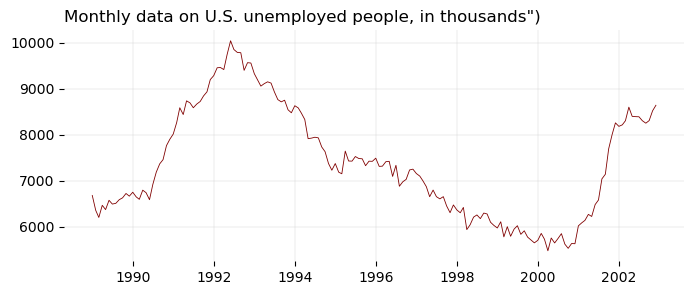

In [4]:
plt.figure(figsize=(8, 3))
plt.plot(unemp, '-', color='maroon', linewidth=0.6)
plt.title('Monthly data on U.S. unemployed people, in thousands")', loc='left')
plt.grid(which='major', color='lightgrey', linewidth=0.3)
plt.box(False)
plt.show()

# 2. ACF and PACF

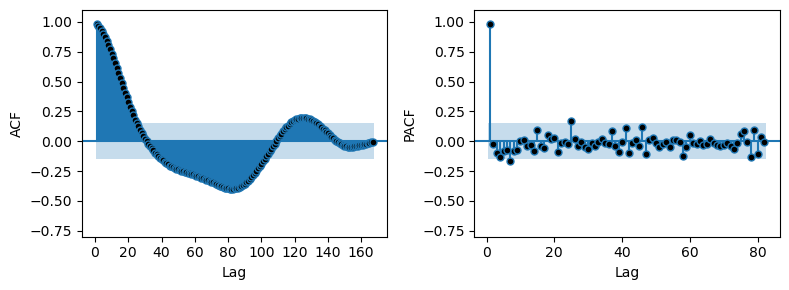

In [5]:
lag_max = len(unemp)-1

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs = axs.flatten()

plot_acf(unemp, lags=lag_max, alpha=0.05, zero=False, mfc='black', 
         bartlett_confint=False, title=None, ax=axs[0])
axs[0].set_ylabel('ACF')
axs[0].set_xticks(np.arange(0, lag_max, step=20))

plot_pacf(unemp, lags=lag_max/2-1, alpha=0.05, zero=False, mfc='black', 
          title=None, ax=axs[1])
axs[1].set_ylabel('PACF')
axs[1].set_xticks(np.arange(0, lag_max/2-1, step=20))

for ax in axs:
    ax.set_ylim(-0.8,1.1)    
    ax.set_xlabel('Lag')

fig.tight_layout() 
plt.show() 

Zoom in on the first 10 lags

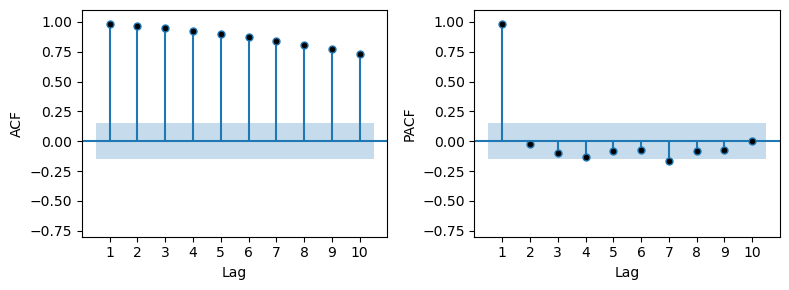

In [6]:
lag_max = 10

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs = axs.flatten()

plot_acf(unemp, lags=lag_max, alpha=0.05, zero=False, mfc='black', 
         bartlett_confint=False, title=None, ax=axs[0])
axs[0].set_ylabel('ACF')

plot_pacf(unemp, lags=lag_max, alpha=0.05, zero=False, mfc='black', 
          title=None, ax=axs[1])
axs[1].set_ylabel('PACF')

for ax in axs:
    ax.set_ylim(-0.8,1.1)    
    ax.set_xticks(np.arange(1, lag_max+1, step=1))    
    ax.set_xlabel('Lag')

fig.tight_layout() 
plt.show() 

Since the ACF has many significant lags while the PACF has 1, the data is well approximated with an AR(1) model. 